# Iklan Kendaraan di Crankshaft List

# Daftar Isi <a id='back'></a>

* [Pendahuluan](#intro)

* [Tahap 1. Ikhtisar Data](#data_review)
    * [Kesimpulan](#data_review_conclusions)
    
* [Tahap 2. Pra-pemrosesan data](#data_preprocessing)
    * [2.1 Mengelola kolom 'price'](#kol_price)
    * [2.2 Mengelola kolom 'model_year'](#kol_model_year)
    * [2.3 Mengelola kolom 'model'](#kol_model)
    * [2.4 Mengelola kolom 'condition'](#kol_condition)
    * [2.5 Mengelola kolom 'cylinders'](#kol_cylinders)
    * [2.6 Mengelola kolom 'fuel'](#kol_fuel)
    * [2.7 Mengelola kolom 'odometer'](#kol_odometer)
    * [2.8 Mengelola kolom 'transmission'](#kol_transmission)
    * [2.9 Mengelola kolom 'type'](#kol_type)
    * [2.10 Mengelola kolom 'paint_color'](#kol_paint_color)
    * [2.11 Mengelola kolom 'is_4wd'](#kol_is_4wd)
    * [2.12 Mengelola kolom 'date_posted'](#kol_date_posted)
    * [2.13 Mengelola kolom 'days_listed'](#kol_days_listed)
    * [2.14 Penambahan kolom 'weekday' 'month' 'year'](#add_kol_weekday_month_year)
    * [2.15 Penambahan kolom 'age'](#add_kol_age)
    * [2.16 Penambahan kolom 'avg_year_trip'](#add_kol_avg_year_trip)
    * [2.17 Kesimpulan](#data_preprocessing_conclusions)
    
* [Tahap 3. Exploratory Data Analysis](#eda)
    * [3.1 Parameter harga, usia kendaraan saat iklan ditayangkan, jarak tempuh, jumlah silinder, dan kondisi](#analysis_1)
    * [3.2 Outlier dan pengaruhnya terhadap histogram](#analysis_2)
    * [3.3 Analisis kolom 'days_listed'](#analysis_3)
    * [3.4 Analisis jumlah iklan dan rata-rata harga per jenis kendaraan](#analysis_4)
    * [3.5 Analisis kendaraan dengan iklan paling populer](#analysis_5)
    
* [Temuan](#end)

## Pendahuluan <a id='intro'></a>

Proyek ini ditujukan untuk memberikan gambaran faktor-faktor yang memengaruhi harga sebuah kendaraan di Crankshaft List. Hasil analisis ini dapat menjadi bahan pertimbangan dan masukan untuk para marketer kendaraan dalam melakukan aktivitas penjualan yang efektif.

### Tujuan: 
Mencari tahu apa saja faktor yang paling memengaruhi harga kendaraan

### Tahapan
Data tentang iklan kendaraan dari website disimpan dalam *file* `/datasets/vehicles_us.csv`. Tidak ada informasi terkait kualitas data tersebut, jadi perlu diperiksa terlebih dahulu sebelum melakukan analisis lebih lanjut.

Pertama akan dilakukan evaluasi kualitas data dan melihat apakah terdapat hal yang signifikan yang perlu dilakukan tindak lanjut sebelum dilakukan proses analisis.

Terkait dengan proses analisis yang akan dilakukan, data berikut ini perlu ditambahkan:
* Hari dalam minggu, bulan, dan tahun iklan ditayangkan
* Usia kendaraan (dalam tahun) ketika iklan ditayangkan
* Jarak tempuh rata-rata kendaraan per tahun
* Nilai string pada condition diganti dengan skala numerik

 
Proyek ini akan terdiri dari tiga tahap:
 1. Ikhtisar Data
 2. Pra-pemrosesan Data
 3. Exploratory Data Analysis

 
[Kembali ke Daftar Isi](#back)

## Tahap 1. Ikhtisar Data <a id='data_review'></a>

Melakukan import library yang diperlukan, membuka data terkait iklan kendaraan yang akan dievaluasi, kemudian menjelajahi data tersebut.

**Step 1.1**
Melakukan import library yang diperlukan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

**Step 1.2**
Melakukan load data yang diperlukan dari file *vehicles_us.csv*

In [2]:
try:
    df = pd.read_csv('vehicles_us.csv')
except:
    df = pd.read_csv('datasets/vehicles_us.csv')

**Step 1.3**
Memeriksa informasi umum dari dataframe yang di-*load* file *vehicles_us.csv*

In [3]:
df.head(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


### Kesimpulan <a id='data_review_conclusions'></a> 

Setiap baris dalam tabel menyimpan data terkait iklan kendaraan yang telah diklankan dalam website. Sejumlah kolom menyimpan data yang mendeskripsikan kendaraan, yakni: harga (price), tahun kendaraan (model_year), model (model), kondisi (condition), jumlah silinder, bensin, odomoter, jenis transmisi, warna cat, dan keterangan 4wd. Sisanya menyimpan data terkait informasi iklan, yakni: date_posted dan days_listed.

Terlihat bahwa data yang dimiliki cukup untuk menganalisis faktor yang mempengaruhi harga kendaraan. Meski demikian, kita memiliki nilai-nilai yang hilang, tipe-tipe data yang tidak sesuai, data yang perlu diklasifikasi lebih baik, serta beberapa data yang perlu ditambahkan untuk analisis lebih lanjut.
 
1. Nilai yang hilang pada kolom: model_year, cylinders, odometer, paintcolor, is4wd
2. Tipe data yang tidak sesuai pada kolom: date_posted (konversi ke datetime), is4wd (konversi ke boolean)
3. Reklasifikasi data: condition (dengan rule: new = 5, like new = 4, excellent = 3, good = 2, fair = 1, salvage = 0)
4. Penambahan data berupa:  - Hari dalam minggu, bulan, dan tahun iklan ditayangkan - Usia kendaraan (dalam tahun) ketika iklan ditayangkan - Jarak tempuh rata-rata kendaraan per tahun

Untuk melanjutkan analisis, kita perlu melakukan pra-pemrosesan data terlebih dahulu.

[Kembali ke Daftar Isi](#back)

## Tahap 2. Pra-pemrosesan Data <a id='data_preprocessing'></a>
Memperbaiki nilai yang hilang, tipe data yang tidak sesuai, reklasifikasi data bila diperlukan, dan memperbaiki duplikat baik implisit maupun eksplisit bila ada.

In [5]:
print(df.isna().sum())

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64


### Mengelola kolom 'price' <a id='kol_price'></a>

Tidak terdapat nilai yang hilang.

In [6]:
df['price'].value_counts().sort_index()

1         798
3           1
5           1
6           1
9           1
         ... 
145000      1
175000      1
189000      6
300000      1
375000      1
Name: price, Length: 3443, dtype: int64

In [7]:
df['price'].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

Meskipun terdapat variasi nilai dengan rentang yang cukup lebar, namun data masih dapat digunakan, terlebih juga tidak terdapat nilai negatif.

### Mengelola kolom 'model_year' <a id='kol_model_year'></a>

Terdapat 3619 nilai yang hilang.

In [8]:
df['model_year'].value_counts().sort_index()

1908.0       2
1929.0       1
1936.0       1
1948.0       1
1949.0       1
          ... 
2015.0    3323
2016.0    2954
2017.0    2419
2018.0    2193
2019.0     380
Name: model_year, Length: 68, dtype: int64

In [9]:
df['model_year'].describe()

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

Meskipun tidak terdapat outlier yang mempengaruhi signifikan nilai rata-rata, data yang diperlukan sebagai nilai pengganti lebih cenderung ke nilai kategorikal, oleh karena itu lebih sesuai digunakan median.

In [10]:
print(df['model_year'].median())
df['model_year'] = df['model_year'].fillna(df['model_year'].median())
print(df.isna().sum())

2011.0
price               0
model_year          0
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64


### Mengelola kolom 'model' <a id='kol_model'></a>

Tidak terdapat nilai yang hilang.

In [11]:
df['model'].value_counts().sort_index()

acura tl             236
bmw x5               267
buick enclave        271
cadillac escalade    322
chevrolet camaro     414
                    ... 
toyota sienna        329
toyota tacoma        827
toyota tundra        603
volkswagen jetta     519
volkswagen passat    350
Name: model, Length: 100, dtype: int64

Tidak terdapat nilai negatif dan tidak terdapat nilai yang hilang sehingga data dapat digunakan.

### Mengelola kolom 'condition' <a id='kol_condition'></a>

Tidak terdapat nilai yang hilang.

In [12]:
df['condition'].value_counts().sort_index()

excellent    24773
fair          1607
good         20145
like new      4742
new            143
salvage        115
Name: condition, dtype: int64

Tidak terdapat nilai negatif dan tidak terdapat nilai yang hilang sehingga data dapat digunakan. Data hanya membutuhkan konversi  ke numerikal.

In [13]:
df['condition'] = df['condition'].where(df['condition'] != 'new', 5)
df['condition'] = df['condition'].where(df['condition'] != 'like new', 4)
df['condition'] = df['condition'].where(df['condition'] != 'excellent', 3)
df['condition'] = df['condition'].where(df['condition'] != 'good', 2)
df['condition'] = df['condition'].where(df['condition'] != 'fair', 1)
df['condition'] = df['condition'].where(df['condition'] != 'salvage', 0)

df['condition'] = df['condition'].astype('int')
df['condition'].unique()

array([2, 4, 1, 3, 0, 5])

### Mengelola kolom 'cylinders' <a id='kol_cylinders'></a>

Terdapat 5260 nilai yang hilang.

In [14]:
df['cylinders'].value_counts().sort_index()

3.0        34
4.0     13864
5.0       272
6.0     15700
8.0     15844
10.0      549
12.0        2
Name: cylinders, dtype: int64

In [15]:
df['cylinders'].describe()

count    46265.000000
mean         6.125235
std          1.660360
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

Meskipun tidak terdapat outlier yang mempengaruhi signifikan nilai rata-rata, data yang diperlukan sebagai nilai pengganti lebih cenderung ke nilai kategorikal, oleh karena itu lebih sesuai digunakan median. Namun demikian, jumlah silinder dipengaruhi oleh model kendaraan sehingga diperlukan grouping median.

In [16]:
cylinders_mapper = df.groupby('model')['cylinders'].median().to_dict()
def cylinders_fill(row):
    if np.isnan(row['cylinders']):
        return cylinders_mapper.get(row['model'])
       
    return row['cylinders']
    
df['cylinders'] = df.apply(cylinders_fill, axis=1)

In [17]:
df.info()
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  int32  
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int32(1), int64(2), object(6)
memory usage: 4.9+ MB
price               0
model_year          0
model               0
condition           0
cylinders           0
fuel                0
odometer         7892
transmission        

### Mengelola kolom 'fuel' <a id='kol_fuel'></a>

Tidak terdapat nilai yang hilang.

In [18]:
df['fuel'].value_counts().sort_index()

diesel       3714
electric        6
gas         47288
hybrid        409
other         108
Name: fuel, dtype: int64

Tidak terdapat nilai negatif dan tidak terdapat nilai yang hilang sehingga data dapat digunakan.

### Mengelola kolom 'odometer' <a id='kol_odometer'></a>

Terdapat 7892 nilai yang hilang.

In [19]:
df['odometer'].value_counts().sort_index()

0.0         185
1.0          28
2.0           2
3.0           1
5.0           9
           ... 
840000.0      2
866000.0      1
920000.0      1
980000.0      1
990000.0      2
Name: odometer, Length: 17762, dtype: int64

In [20]:
df['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

Meskipun tidak terdapat outlier yang mempengaruhi signifikan nilai rata-rata, data yang diperlukan sebagai nilai pengganti lebih cenderung ke nilai kategorikal, oleh karena itu lebih sesuai digunakan median. Namun demikian, odometer dapat dipengaruhi oleh tahun mobil dan kondisi sehingga diperlukan grouping median.

In [21]:
odometer_mapper = df.groupby(['model_year', 'condition'])['odometer'].median().to_dict()
def odometer_fill(row):
    if np.isnan(row['odometer']):
        return odometer_mapper.get((row['model_year'], row['condition']))
  
    return row['odometer']

df['odometer'] = df.apply(odometer_fill, axis=1)

In [22]:
df.info()
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  int32  
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51518 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int32(1), int64(2), object(6)
memory usage: 4.9+ MB
price               0
model_year          0
model               0
condition           0
cylinders           0
fuel                0
odometer            7
transmission        

Nilai yang hilang masih tetap ada namun jauh lebih berkurang dari yang sebelumnya, selanjutnya data masih bisa digunakan.

### Mengelola kolom 'transmission' <a id='kol_transmission'></a>

Tidak terdapat nilai yang hilang.

In [23]:
df['transmission'].value_counts().sort_index()

automatic    46902
manual        2829
other         1794
Name: transmission, dtype: int64

Tidak terdapat nilai negatif dan tidak terdapat nilai yang hilang sehingga data dapat digunakan.

### Mengelola kolom 'type' <a id='kol_type'></a>

Tidak terdapat nilai yang hilang.

In [24]:
df['type'].value_counts().sort_index()

SUV            12405
bus               24
convertible      446
coupe           2303
hatchback       1047
mini-van        1161
offroad          214
other            256
pickup          6988
sedan          12154
truck          12353
van              633
wagon           1541
Name: type, dtype: int64

Tidak terdapat nilai negatif dan tidak terdapat nilai yang hilang sehingga data dapat digunakan.

### Mengelola kolom 'paint_color' <a id='kol_paint_color'></a>

Terdapat 9267 nilai yang hilang.

In [25]:
df['paint_color'].value_counts().sort_index()

black      7692
blue       4475
brown      1223
custom     1153
green      1396
grey       5037
orange      231
purple      102
red        4421
silver     6244
white     10029
yellow      255
Name: paint_color, dtype: int64

In [26]:
df['paint_color'].describe()

count     42258
unique       12
top       white
freq      10029
Name: paint_color, dtype: object

Tidak semua nilai yang hilang dapat selalu diganti. Terkait dengan paint_color, menimbang urgensinya terhadap proses analisis tidak terlalu signifikan, terlebih apabila barisnya dihapus akan mengganggu informasi penting pada kolom lainnya, diputuskan untuk dibiarkan apa adanya.

### Mengelola kolom 'is_4wd' <a id='kol_is_4wd'></a>

Terdapat 25953 nilai yang hilang.

In [27]:
df['is_4wd'].value_counts().sort_index()

1.0    25572
Name: is_4wd, dtype: int64

In [28]:
df['is_4wd'].unique()

array([ 1., nan])

Ditemukan bahwa nilai yang hilang pada dasarnya adalah nilai yang berlawanan dengan nilai yang terisi, sehingga nilai-nilai pada kolom ini dapat dikonversi ke boolean.

In [29]:
df['is_4wd'] = df['is_4wd'].where(df['is_4wd'] == 1, 0)
df['is_4wd'] = df['is_4wd'].astype('bool')
df['is_4wd'].unique()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  int32  
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51518 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  bool   
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: bool(1), float64(3), int32(1), int64(2), object(6)
memory usage: 4.6+ MB


### Mengelola kolom 'date_posted' <a id='kol_date_posted'></a>

Tidak terdapat nilai yang hilang.

In [30]:
df['date_posted'].value_counts().sort_index()

2018-05-01    124
2018-05-02    155
2018-05-03    164
2018-05-04    150
2018-05-05    133
             ... 
2019-04-15    149
2019-04-16    138
2019-04-17    143
2019-04-18    154
2019-04-19    150
Name: date_posted, Length: 354, dtype: int64

Untuk dapat dianalisis lebih lanjut, perlu penyesuaian tipe data kolom ini dengan melakukan konversi ke datetime.

In [31]:
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  int32         
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51518 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(3), int32(1), int64(2), object(5)
memory usage: 4.6+ MB


### Mengelola kolom 'days_listed' <a id='kol_days_listed'></a>

Tidak terdapat nilai yang hilang.

In [32]:
df['days_listed'].value_counts().sort_index()

0       54
1      173
2      259
3      384
4      438
      ... 
256      1
261      1
263      1
267      1
271      1
Name: days_listed, Length: 227, dtype: int64

### Penambahan kolom 'weekday' 'month' 'year' <a id='add_kol_weekday_month_year'></a>

Mengaplikasi tiga metode ke kolom date_posted yaitu dt.weekday_name untuk hari dalam minggu, dt.month_name untuk bulan, dan dt.year untuk tahun.

In [33]:
df['weekday'] = df['date_posted'].dt.dayofweek
df['month'] = df['date_posted'].dt.month
df['year'] = df['date_posted'].dt.year
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,SUV,NaN,True,2018-06-23,19,5,6,2018
1,25500,2011.0,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,10,2018
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2,2019
3,1500,2003.0,ford f-150,1,8.0,gas,193850.0,automatic,pickup,NaN,False,2019-03-22,9,4,3,2019
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,4,2019


### Penambahan kolom 'age' <a id='add_kol_age'></a>

In [34]:
df['age'] = df['year'] - df['model_year']
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,age
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,SUV,NaN,True,2018-06-23,19,5,6,2018,7.0
1,25500,2011.0,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,10,2018,7.0
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2,2019,6.0
3,1500,2003.0,ford f-150,1,8.0,gas,193850.0,automatic,pickup,NaN,False,2019-03-22,9,4,3,2019,16.0
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2.0


### Penambahan kolom 'avg_year_trip' <a id='add_kol_avg_year_trip'></a>

In [35]:
df['avg_year_trip'] = df['odometer'] / df['age']
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,age,avg_year_trip
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,SUV,NaN,True,2018-06-23,19,5,6,2018,7.0,20714.285714
1,25500,2011.0,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,10,2018,7.0,12672.142857
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2,2019,6.0,18333.333333
3,1500,2003.0,ford f-150,1,8.0,gas,193850.0,automatic,pickup,NaN,False,2019-03-22,9,4,3,2019,16.0,12115.625000
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2.0,40451.500000


### Kesimpulan <a id='data_preprocessing_conclusions'></a>

* Data yang hilang dari 5 kolom (model_year 3619 item, cylinders 5260 item, odometer 7892 item, paint_color 9267 item, dan is_4wd 25953 item) telah ditangani hingga hanya tinggal bersisa 2 kolom saja (odometer 7 item, paint_color 9267 item). Pertimbangan proporsionalitas dan signifikansi efek turut mewarnai pemrosesan data yang hilang.
* Data minus tidak terdapat di semua kolom.
* Penginputan dengan *letter case* yang tidak seragam relatif bersih di semua kolom. Hanya terdapat penulisan SUV pada kolom type dengan uppercase yang berbeda sendiri dengan lainnya, namun tidak dilakukan perubahan karena tidak mengganggu data dan proses analisis dan juga memang karena uppercase tersebut menandakan singkatan sesuatu.
* Mengganti nilai skala kategorikal menjadi nilai skala numerikal pada kolom condition.
* Memperbaiki tipe data kolom date_posted (datetime) dan is_4wd (boolean).
* Menambahkan lima kolom data baru yakni weekday, month, year, age, dan avg_year_trip.

[Kembali ke Daftar Isi](#back)

## Exploratory Data Analysis <a id='eda'></a>
Melakukan analisis beberapa faktor yang mempengaruhi harga kendaraan.

### Parameter harga, usia kendaraan saat iklan ditayangkan, jarak tempuh, jumlah silinder, dan kondisi  <a id='analysis_1'></a>

Analisis terkait parameter harga, usia kendaraan saat iklan ditayangkan, jarak tempuh, jumlah silinder, dan kondisi kendaraan akan disajikan dalam grafik histogram, dan untuk selanjutnya dilakukan analisis dampak outlier terhadap bentuk dan pola dari histogram.

#### Histogram

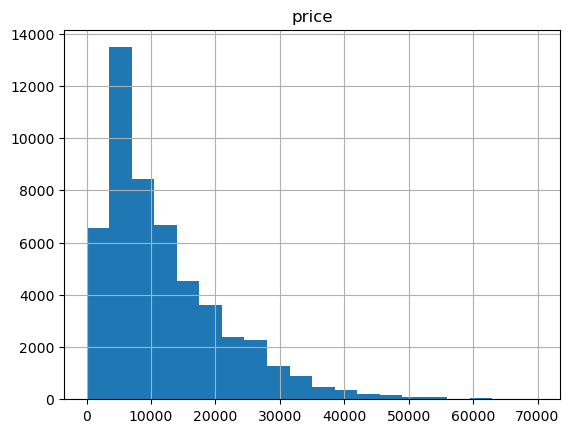

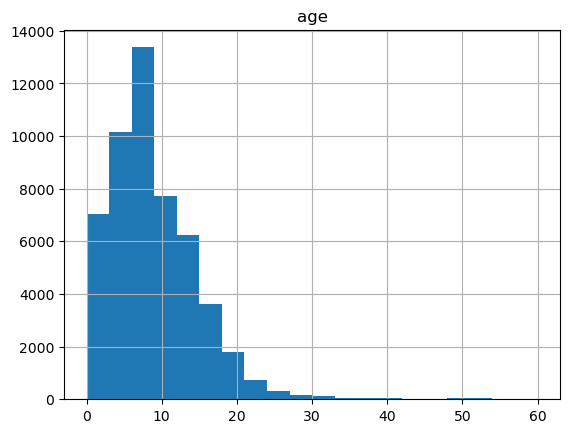

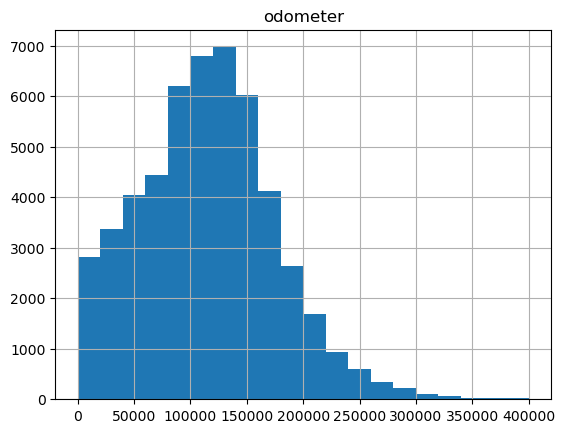

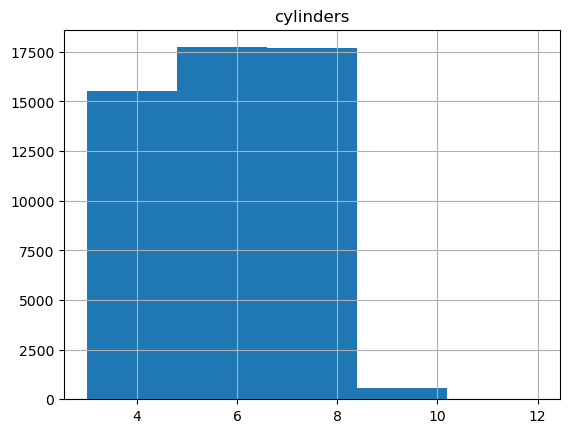

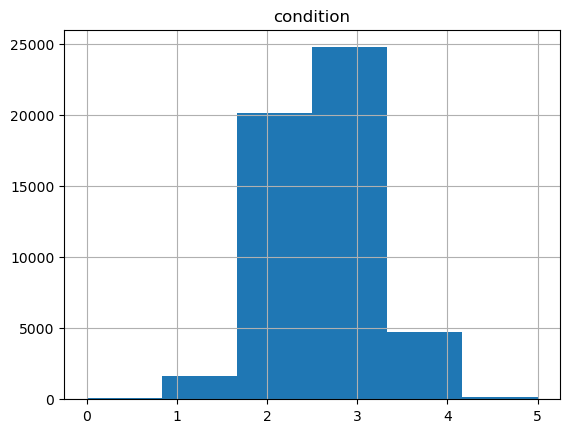

In [36]:
df['price'].hist(bins=20, range=(0, 70000))
plt.title('price')
plt.show()

df['age'].hist(bins=20, range=(0, 60))
plt.title('age')
plt.show()

df['odometer'].hist(bins=20, range=(0, 400000))
plt.title('odometer')
plt.show()

df['cylinders'].hist(bins=5)
plt.title('cylinders')
plt.show()

df['condition'].hist(bins=6)
plt.title('condition')
plt.show()

Pada grafik histogram harga, usia kendaraan saat iklan ditayangkan, dan jarak tempuh secara berturut bin mulai mendekati ekor (sumbu y mendekati nol) setelah 40000, 30, dan 250000. Pada histogram lainnya tidak terdeteksi. Data ini akan dimasukkan ke perhitungan selanjutnya untuk menganalisis pengaruh outlier terhadap histogram.

### Outlier dan pengaruhnya terhadap histogram  <a id='analysis_2'></a>

Memasukkan outlier dalam dataframe yang terpisah

In [37]:
outlier_df = df.query('price > 40000 & age > 30 & odometer > 250000')
outlier_df.info()
outlier_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 17869 to 17869
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   price          1 non-null      int64         
 1   model_year     1 non-null      float64       
 2   model          1 non-null      object        
 3   condition      1 non-null      int32         
 4   cylinders      1 non-null      float64       
 5   fuel           1 non-null      object        
 6   odometer       1 non-null      float64       
 7   transmission   1 non-null      object        
 8   type           1 non-null      object        
 9   paint_color    1 non-null      object        
 10  is_4wd         1 non-null      bool          
 11  date_posted    1 non-null      datetime64[ns]
 12  days_listed    1 non-null      int64         
 13  weekday        1 non-null      int64         
 14  month          1 non-null      int64         
 15  year           1 no

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,age,avg_year_trip
17869,59900,1964.0,chevrolet corvette,4,8.0,gas,990000.0,automatic,convertible,red,False,2018-06-17,28,6,6,2018,54.0,18333.333333


In [38]:
filtered_df = df.query('price < 40000 & age < 30 & odometer < 250000')
filtered_df.info()
filtered_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49300 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   price          49300 non-null  int64         
 1   model_year     49300 non-null  float64       
 2   model          49300 non-null  object        
 3   condition      49300 non-null  int32         
 4   cylinders      49300 non-null  float64       
 5   fuel           49300 non-null  object        
 6   odometer       49300 non-null  float64       
 7   transmission   49300 non-null  object        
 8   type           49300 non-null  object        
 9   paint_color    40405 non-null  object        
 10  is_4wd         49300 non-null  bool          
 11  date_posted    49300 non-null  datetime64[ns]
 12  days_listed    49300 non-null  int64         
 13  weekday        49300 non-null  int64         
 14  month          49300 non-null  int64         
 15  year           4930

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,age,avg_year_trip
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,SUV,NaN,True,2018-06-23,19,5,6,2018,7.0,20714.285714
1,25500,2011.0,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,10,2018,7.0,12672.142857
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2,2019,6.0,18333.333333
3,1500,2003.0,ford f-150,1,8.0,gas,193850.0,automatic,pickup,NaN,False,2019-03-22,9,4,3,2019,16.0,12115.625000
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2.0,40451.500000


Histogram dengan parameter yang sama dari dataframe telah difilter

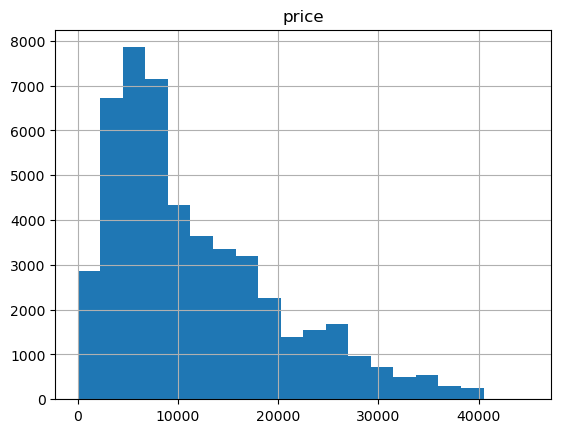

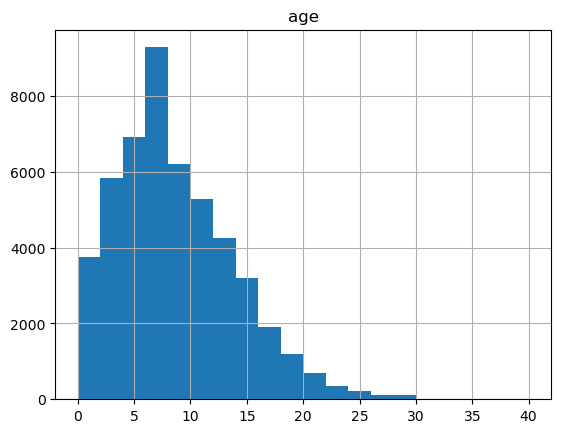

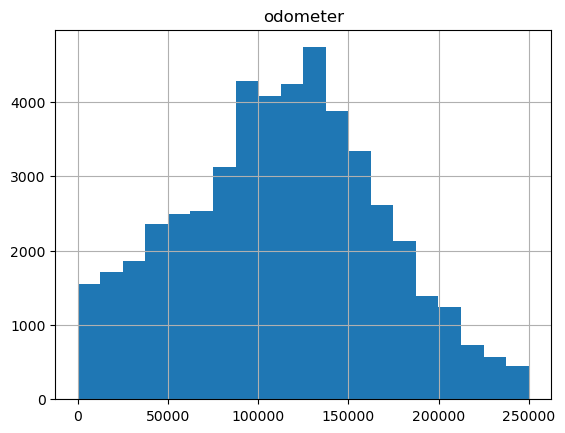

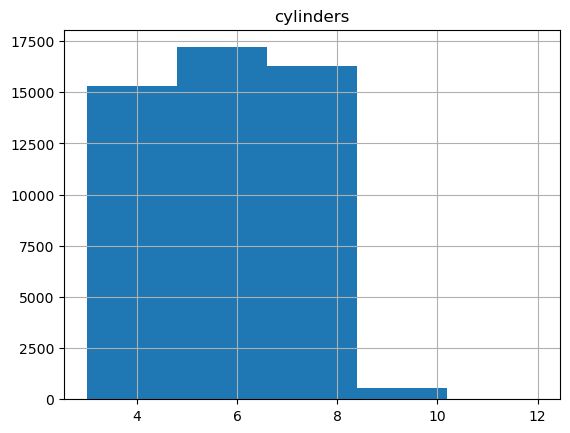

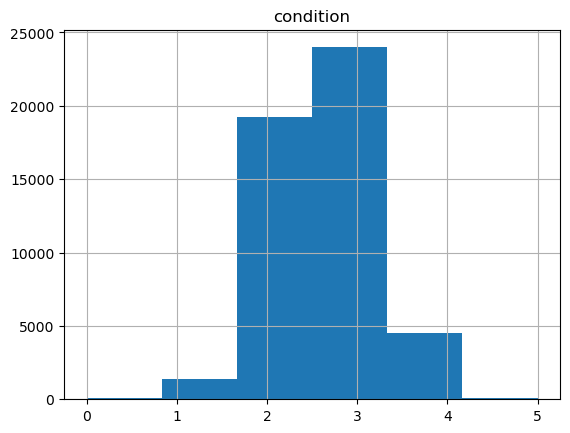

In [39]:
filtered_df['price'].hist(bins=20, range=(0, 45000))
plt.title('price')
plt.show()

filtered_df['age'].hist(bins=20, range=(0, 40))
plt.title('age')
plt.show()

filtered_df['odometer'].hist(bins=20)
plt.title('odometer')
plt.show()

filtered_df['cylinders'].hist(bins=5)
plt.title('cylinders')
plt.show()

filtered_df['condition'].hist(bins=6)
plt.title('condition')
plt.show()

Histogram harga memuncak pada 5000, setelahnya menurun kemudian meningkat landai pada 25000. Histogram usia kendaraan memuncak pada 5, sedangkan histogram jarak tempuh memuncak pada kisaran 125000 dimana peningkatan juga terjadi di kisaran 100000. Perbedaan dari set grafik yang sebelumnya adalah pada set grafik kali ini memiliki banyak undakan naik-turun mengingat keterbatasan data set angka penyusun. Penampakan ekor data juga menghilang, meski memiliki titik puncak yang sama.

### Analisis kolom 'days_listed'   <a id='analysis_3'></a>

In [40]:
filtered_df['days_listed'].describe()

count    49300.000000
mean        39.551075
std         28.227127
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

Menghasilkan rata-rata di kisaran 39 hari dan median di 33 hari.

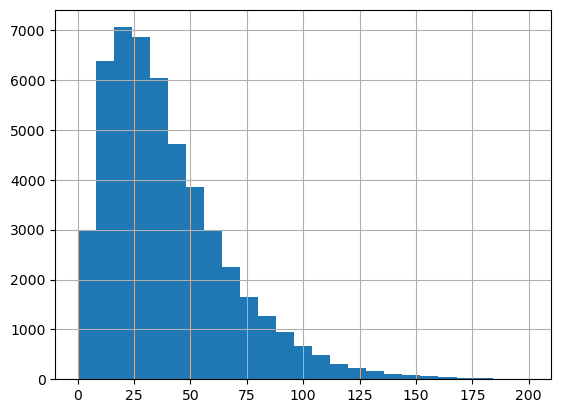

In [41]:
filtered_df['days_listed'].hist(bins=25, range=(0, 200))
plt.show()

Untuk mencari tahu masa tayang iklan, digunakan boxplot.

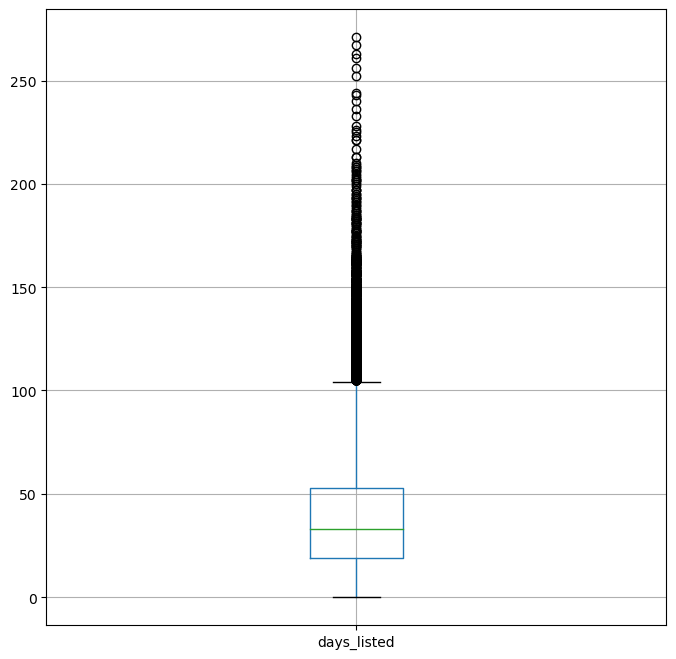

In [42]:
filtered_df.boxplot(column='days_listed', figsize=(8,8))
plt.show()

Masa tayang iklan berkisar 19 hingga 50 hari. Di atas 100 hari dapat dikategorikan tidak normal, begitu pula dari 0 hingga 19 dapat diaktegorikan terlalu cepat.

### Analisis jumlah iklan dan rata-rata harga per jenis kendaraan  <a id='analysis_4'></a>

In [43]:
type_price_stat=filtered_df.pivot_table(index='type', values='price', aggfunc='median')
type_price_stat

,price
type,
SUV,8900
bus,10500
convertible,11000
coupe,12900
hatchback,5995
mini-van,6500
offroad,11900
other,8995
pickup,14750


In [44]:
type_ads_stat=filtered_df['type'].value_counts()
type_ads_stat

SUV            12035
sedan          11989
truck          11538
pickup          6533
coupe           2082
wagon           1497
mini-van        1140
hatchback       1015
van              618
convertible      384
other            244
offroad          201
bus               24
Name: type, dtype: int64

In [45]:
type_stat=type_price_stat.join(type_ads_stat)
type_stat.columns = ['price', 'ads']
type_stat = type_stat.sort_values('ads', ascending=False)
type_stat

,price,ads
type,,
SUV,8900,12035
sedan,5995,11989
truck,14995,11538
pickup,14750,6533
coupe,12900,2082
wagon,7900,1497
mini-van,6500,1140
hatchback,5995,1015
van,7995,618


Tipe kendaraan yang paling populer adalah **SUV** dan **sedan**

### Analisis kendaraan dengan iklan paling populer  <a id='analysis_5'></a>

**Jenis SUV (Populer posisi pertama)**

In [46]:
SUV_data = filtered_df.query('type == "SUV"')
SUV_data = SUV_data[['price', 'age', 'odometer', 'condition', 'transmission', 'paint_color']]
SUV_data = SUV_data.reset_index(drop=True)
SUV_data.head()

,price,age,odometer,condition,transmission,paint_color
0,9400,7.0,145000.0,2,automatic,NaN
1,15990,6.0,109473.0,3,automatic,black
2,11500,6.0,104174.0,3,automatic,NaN
3,9200,11.0,147191.0,3,automatic,blue
4,12990,10.0,132285.0,3,automatic,black


Boxplot untuk membandingkan harga dengan transmisi dan warna cat, serta scatterplot untuk lainnya.

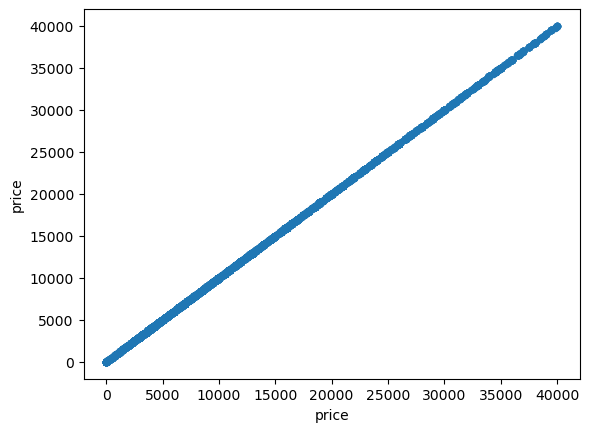

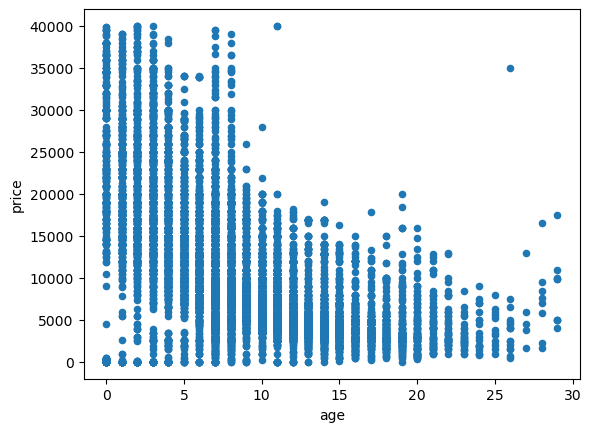

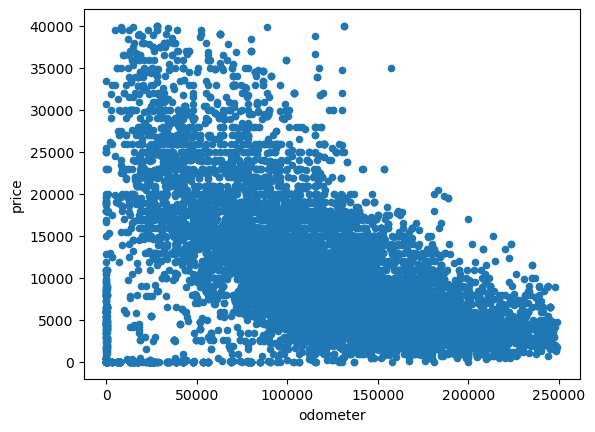

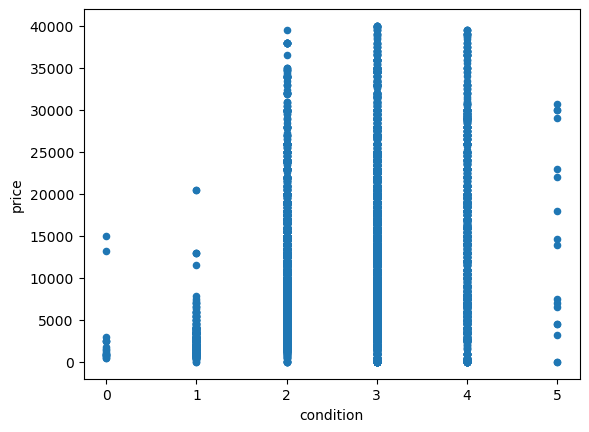

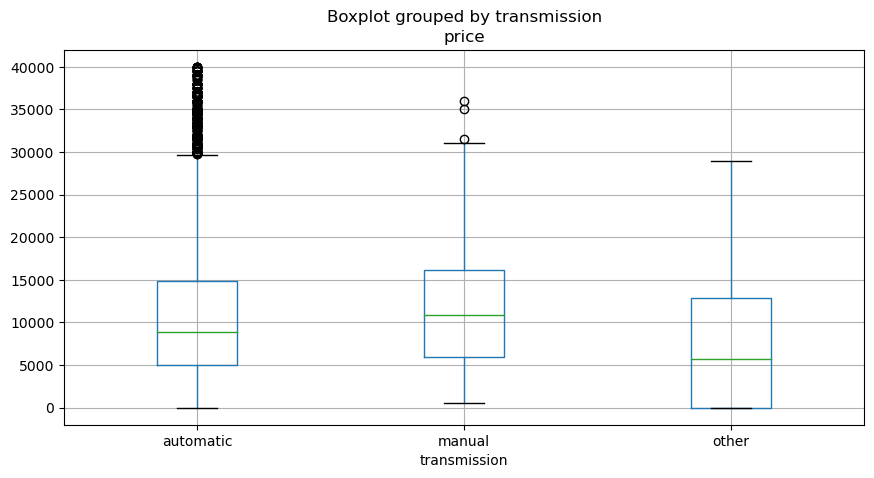

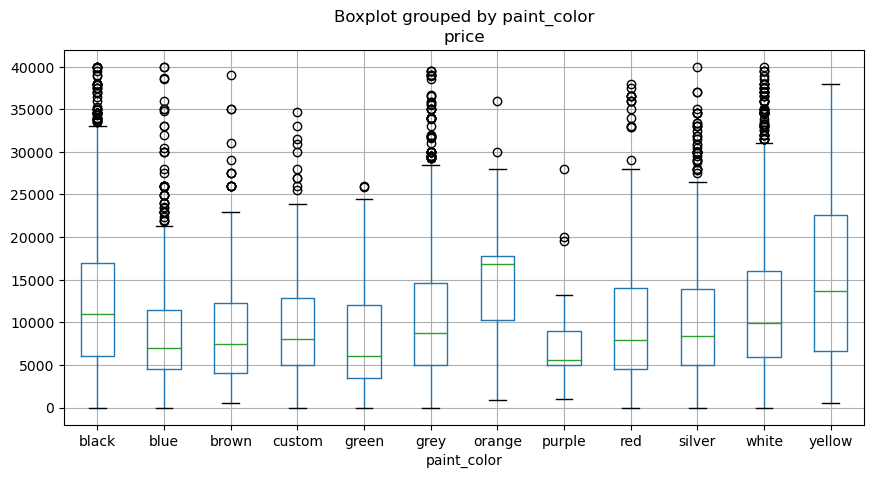

In [47]:
for col in SUV_data.columns: 
    if (col == 'transmission')|(col == 'paint_color'):
        SUV_data.boxplot(column='price', by=col, figsize=(10, 5))
        plt.show()
        
    else:
        SUV_data.plot(x=col, y='price', kind='scatter')
        plt.show()

In [48]:
SUV_data.corr()

,price,age,odometer,condition
price,1.000000,-0.570049,-0.534634,0.269721
age,-0.570049,1.000000,0.616897,-0.310179
odometer,-0.534634,0.616897,1.000000,-0.342918
condition,0.269721,-0.310179,-0.342918,1.000000


Dari matrix korelasi di atas, usia kendaraan pada saat diiklankan merupakan faktor yang paling berpengaruh terhadap harga, diikuti oleh jarak tempuh. Kondisi memiliki sedikit korelasi atau sama sekali tidak ada korelasi. 
Dari boxplot, SUV warna kuning dan SUV transmisi manual memiliki harga yang relatif lebih tinggi.

**Jenis sedan (Populer posisi kedua)**

In [49]:
sedan_data = filtered_df.query('type == "sedan"')
sedan_data = sedan_data[['price', 'age', 'odometer', 'condition', 'transmission', 'paint_color']]
sedan_data = sedan_data.reset_index(drop=True)
sedan_data.head()

,price,age,odometer,condition,transmission,paint_color
0,5500,6.0,110000.0,4,automatic,red
1,14900,2.0,80903.0,3,automatic,black
2,14990,4.0,57954.0,3,automatic,black
3,12990,3.0,79212.0,3,automatic,white
4,8990,7.0,111142.0,3,automatic,grey


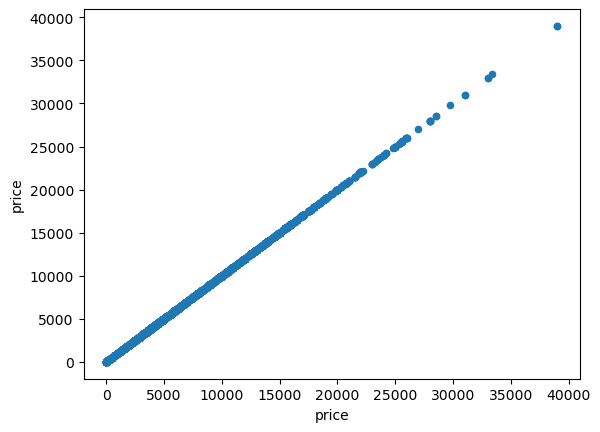

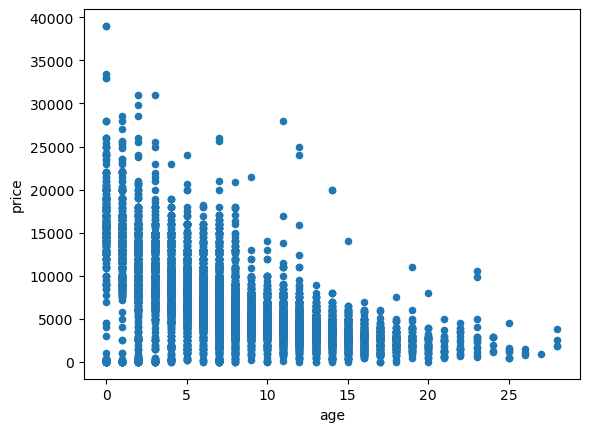

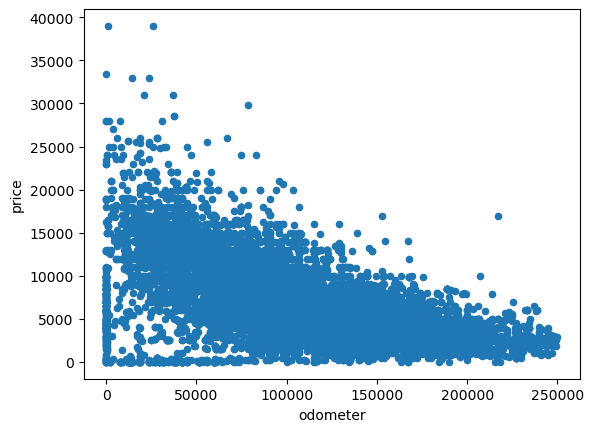

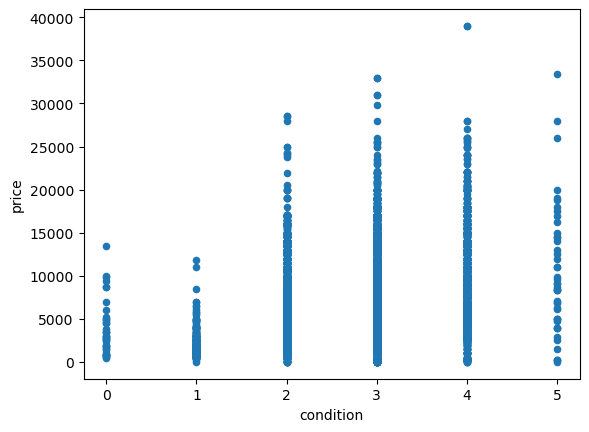

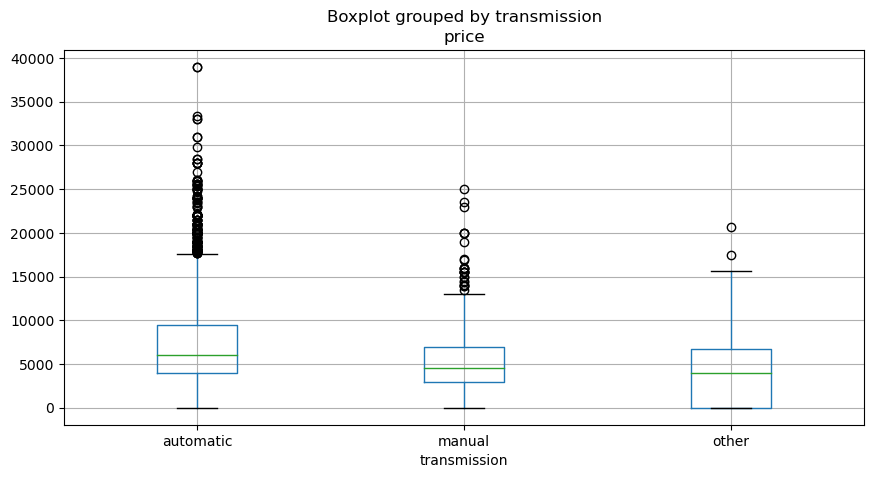

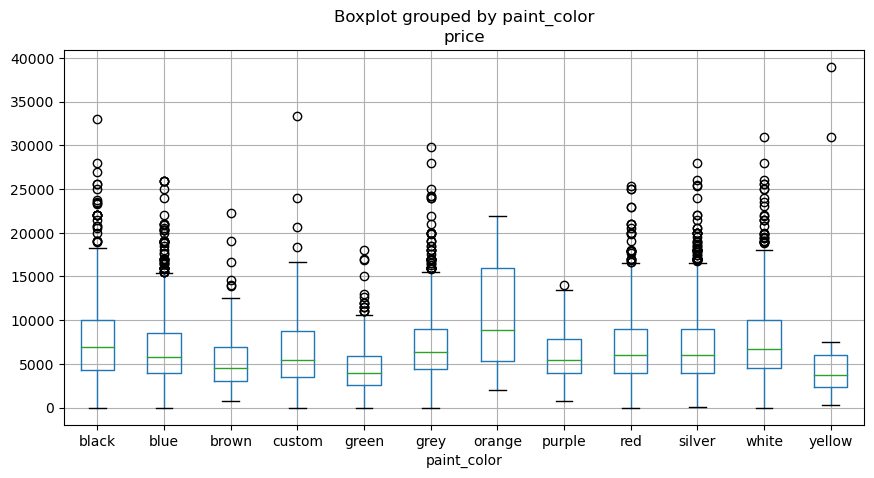

In [50]:
for col in sedan_data.columns:
    if (col == 'transmission')|(col == 'paint_color'):
        sedan_data.boxplot(column='price', by=col, figsize=(10, 5))
        plt.show()
    else:
        sedan_data.plot(x=col, y='price', kind='scatter')
        plt.show()

In [51]:
sedan_data.corr()

,price,age,odometer,condition
price,1.000000,-0.612876,-0.562666,0.292214
age,-0.612876,1.000000,0.615454,-0.294615
odometer,-0.562666,0.615454,1.000000,-0.340435
condition,0.292214,-0.294615,-0.340435,1.000000


Dari matrix korelasi, usia kendaraan masih tetap yang paling berpengaruh terhadap harga, diikuti oleh jarak tempuh. Kondisi memiliki sedikit korelasi atau sama sekali tidak ada korelasi. 
Dari boxplot, sedan berwarna oranye dan sedan bertransmisi otomatis memiliki harga yang relatif lebih tinggi.

## Temuan <a name='end'></a>

Dari analisis dataset original dan dataset terfilter, dengan menggunakan histogram, dapat disimpulkan bahwa masa tayang iklan pada umumnya berkisar antara 19 dan 50 hari, lebih dari 100 hari dapat dikategorikan tidak normal.

Dari analisis dua tipe kendaraan dengan jumlah iklan terbanyak, dengan menggunakan boxplot, scatterplot, matrix korelasi, dapat diatraik kesimpulan bahwa faktor yang sangat mempengaruhi harga adalah usia kendaraan pada saat diiklankan, diikuti oleh jarak tempuh. Juga ditemukan bahwa untuk jenis SUV (posisi pertama yang populer), kuning adalah warna cat mobil dengan harga yang relatif lebih tinggi, dan tranmisi manual lebih diminati. Untuk jenis sedan (posisi kedua yang populer), oranye adalah warna cat mobil dengan harga yang relatif lebih tinggi, dan tranmisi otomatis lebih diminati.

[Kembali ke Daftar Isi](#back)